In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from functions import *

In [2]:
fish = pd.read_csv(r'C:\Users\adria\Desktop\Growth_of_juvenile_Atlantic_salmon_Reproducible_code\Datasets\Observational\Marine Institute\Atlantic salmon\Processed\juvenile_atlantic_salmon_2023-05-30.csv', parse_dates = ['date'])
fish = fish[(fish.lengthmm.notna())&(fish.cohort <=2019)]
fish

,cohort,date,age,dayofyear,lengthmm,river,age_class
0,1997,1997-11-23,337,327,68.0,Roug,0
1,1997,1997-11-23,337,327,70.0,Roug,0
2,1997,1997-11-25,339,329,68.0,Roug,0
3,1997,1997-12-08,352,342,71.0,Roug,0
4,1997,1997-12-08,352,342,60.0,Roug,0
...,...,...,...,...,...,...,...
35714,2017,2019-06-18,909,169,129.0,Sea-entry,2
35715,1995,1996-09-25,644,269,79.0,Roug,1
35716,1995,1996-09-25,644,269,81.0,Roug,1
35717,1995,1996-09-25,644,269,82.0,Roug,1


In [3]:
wt = pd.read_csv(r'C:\Users\adria\Desktop\Growth_of_juvenile_Atlantic_salmon_Reproducible_code\Datasets\Simulated\Water_Temperature\Water_Temperature.csv', parse_dates=['date'], index_col = 0)
wt

,date,wt
365,1962-01-01,2.393565
366,1962-01-02,2.496376
367,1962-01-03,2.456608
368,1962-01-04,2.277996
369,1962-01-05,2.468114
...,...,...
21544,2019-12-27,5.978017
21545,2019-12-28,6.271645
21546,2019-12-29,6.285390
21547,2019-12-30,6.372072


In [4]:
def freshwater_residency(time_to_smolt, wt, fish = None):
    ''' 
    This function will make a complete timeline for each cohort
    '''
    from datetime import date, timedelta
    ### for future reference - years_to_smolt must be supplied before df
    cohort_list = []         # To store all potential cohorts
    date_list = []           # Store all dates belonging to the cohort (3 years) for Rough River
    age_list = []            # Get running age of fish from proxy spawning

    wt.set_index('date', inplace = True)

    for year in np.unique(wt.index.year):
        start_date = date(year-1, 12, 21)                   # Cohorts are assigned year for when they first appear in the dataset (usually the year following the spawning event)
        end_date = date(year+(time_to_smolt), 12, 31)        # Cohorts have different freshwater residency time, 3 in the Burrishoole and 4-6 in the Skjoma
        age = 0                                             # Have running dates from time of spawning
        for single_date in daterange(start_date, end_date):
            cohort_list.append(year)                                    # Store cohort = year in the list
            date_list.append(single_date.strftime('%Y-%m-%d'))          # Store date in the list
            age_list.append(age)                                        # Store day in the list
            linearised_cohorts = zip(cohort_list, date_list, age_list) # Merge lists
            age += 1                                                    # Increment day before next turn in the loop
    linearised_cohorts = pd.DataFrame(list(linearised_cohorts))
    linearised_cohorts = linearised_cohorts.rename(columns = {0:'cohort', 1: 'date', 2:'age'})
    linearised_cohorts.reset_index(inplace = True, drop = True)
    linearised_cohorts['date'] = pd.to_datetime(linearised_cohorts['date'])
    linearised_cohorts = pd.merge(linearised_cohorts, wt, on = ['date'], how = 'outer')
    linearised_cohorts = linearised_cohorts[linearised_cohorts.wt.notna()].reset_index(drop = True)
    return(linearised_cohorts)


In [5]:
df = freshwater_residency(2, wt)

df['wt_1'] = [i-1 if i>1 else 0 for i in df['wt']]
df['wt_2'] = [i-2 if i>2 else 0 for i in df['wt']]
df['wt_3'] = [i-3 if i>3 else 0 for i in df['wt']]
df['wt_4'] = [i-4 if i>4 else 0 for i in df['wt']]
df['wt_5'] = [i-5 if i>5 else 0 for i in df['wt']]
df['wt_6'] = [i-6 if i>6 else 0 for i in df['wt']]
df['wt_7'] = [i-7 if i>7 else 0 for i in df['wt']]
df['wt_8'] = [i-8 if i>8 else 0 for i in df['wt']]
df['wt_9'] = [i-9 if i>9 else 0 for i in df['wt']]
df['wt_10'] = [i-10 if i>10 else 0 for i in df['wt']]


df['DD_t0_0'] = df.groupby('cohort')['wt'].cumsum()
df['DD_t0_1'] = df.groupby('cohort')['wt_1'].cumsum()
df['DD_t0_2'] = df.groupby('cohort')['wt_2'].cumsum()
df['DD_t0_3'] = df.groupby('cohort')['wt_3'].cumsum()
df['DD_t0_4'] = df.groupby('cohort')['wt_4'].cumsum()
df['DD_t0_5'] = df.groupby('cohort')['wt_5'].cumsum()
df['DD_t0_6'] = df.groupby('cohort')['wt_6'].cumsum()
df['DD_t0_7'] = df.groupby('cohort')['wt_7'].cumsum()
df['DD_t0_8'] = df.groupby('cohort')['wt_8'].cumsum()
df['DD_t0_9'] = df.groupby('cohort')['wt_9'].cumsum()
df['DD_t0_10'] = df.groupby('cohort')['wt_10'].cumsum()

In [6]:
df = pd.merge(df, fish, on = ['cohort', 'date'], how = 'outer')

In [7]:
df

,cohort,date,age_x,wt,wt_1,wt_2,wt_3,wt_4,wt_5,wt_6,...,DD_t0_6,DD_t0_7,DD_t0_8,DD_t0_9,DD_t0_10,age_y,dayofyear,lengthmm,river,age_class
0,1962,1962-01-01,11,2.393565,1.393565,0.393565,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,1962,1962-01-02,12,2.496376,1.496376,0.496376,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,1962,1962-01-03,13,2.456608,1.456608,0.456608,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,1962,1962-01-04,14,2.277996,1.277996,0.277996,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,1962,1962-01-05,15,2.468114,1.468114,0.468114,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97422,2017,2019-12-30,1104,6.372072,5.372072,4.372072,3.372072,2.372072,1.372072,0.372072,...,5339.651663,4449.327076,3700.930758,3042.944541,2449.043367,NaN,NaN,NaN,NaN,NaN
97423,2018,2019-12-30,739,6.372072,5.372072,4.372072,3.372072,2.372072,1.372072,0.372072,...,3557.816136,2973.699533,2485.074647,2064.086539,1678.059309,NaN,NaN,NaN,NaN,NaN
97424,2019,2019-12-30,374,6.372072,5.372072,4.372072,3.372072,2.372072,1.372072,0.372072,...,1777.586633,1451.929092,1197.083991,986.295069,786.027796,NaN,NaN,NaN,NaN,NaN
97425,2018,2019-12-31,740,6.445484,5.445484,4.445484,3.445484,2.445484,1.445484,0.445484,...,3558.261620,2973.699533,2485.074647,2064.086539,1678.059309,NaN,NaN,NaN,NaN,NaN


In [8]:
model_t0_0 = smf.ols(formula = 'lengthmm ~ DD_t0_0', data=df, missing = 'drop').fit()
model_t0_1 = smf.ols(formula = 'lengthmm ~ DD_t0_1', data=df, missing = 'drop').fit()
model_t0_2 = smf.ols(formula = 'lengthmm ~ DD_t0_2', data=df, missing = 'drop').fit()
model_t0_3 = smf.ols(formula = 'lengthmm ~ DD_t0_3', data=df, missing = 'drop').fit()
model_t0_4 = smf.ols(formula = 'lengthmm ~ DD_t0_4', data=df, missing = 'drop').fit()
model_t0_5 = smf.ols(formula = 'lengthmm ~ DD_t0_5', data=df, missing = 'drop').fit()
model_t0_6 = smf.ols(formula = 'lengthmm ~ DD_t0_6', data=df, missing = 'drop').fit()
model_t0_7 = smf.ols(formula = 'lengthmm ~ DD_t0_7', data=df, missing = 'drop').fit()
model_t0_8 = smf.ols(formula = 'lengthmm ~ DD_t0_8', data=df, missing = 'drop').fit()
model_t0_9 = smf.ols(formula = 'lengthmm ~ DD_t0_9', data=df, missing = 'drop').fit()
model_t0_10 = smf.ols(formula = 'lengthmm ~ DD_t0_10', data=df, missing = 'drop').fit()

In [9]:
t0_plot = pd.DataFrame(np.arange(0,11))
t0_plot['Daysof0'] = df[df['wt'] == 0]['wt'].count(), df[df['wt_1'] == 0]['wt_1'].count(), df[df['wt_2'] == 0]['wt_2'].count(), df[df['wt_3'] == 0]['wt_3'].count(), df[df['wt_4'] == 0]['wt_4'].count(), df[df['wt_5'] == 0]['wt_5'].count(), df[df['wt_6'] == 0]['wt_6'].count(), df[df['wt_7'] == 0]['wt_7'].count(), df[df['wt_8'] == 0]['wt_8'].count(), df[df['wt_9'] == 0]['wt_9'].count(), df[df['wt_10'] == 0]['wt_10'].count()
t0_plot['AIC'] = model_t0_0.aic, model_t0_1.aic, model_t0_2.aic, model_t0_3.aic, model_t0_4.aic, model_t0_5.aic, model_t0_6.aic, model_t0_7.aic, model_t0_8.aic, model_t0_9.aic, model_t0_10.aic

Text(0.5, 0, 'Baseline temperature ($t_0 = i$)')

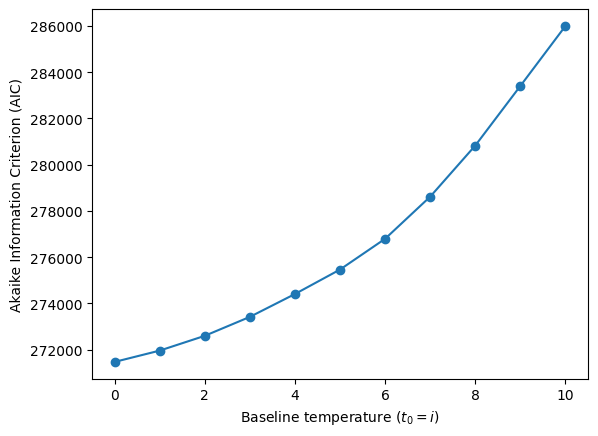

In [10]:
plt.plot(t0_plot[0], t0_plot['AIC'], marker = 'o')
plt.ylabel('Akaike Information Criterion (AIC)')
plt.xlabel(r'Baseline temperature ($t_0 = i$)')

Text(0.5, 0, 'Temperature baseline $t_0 = i$')

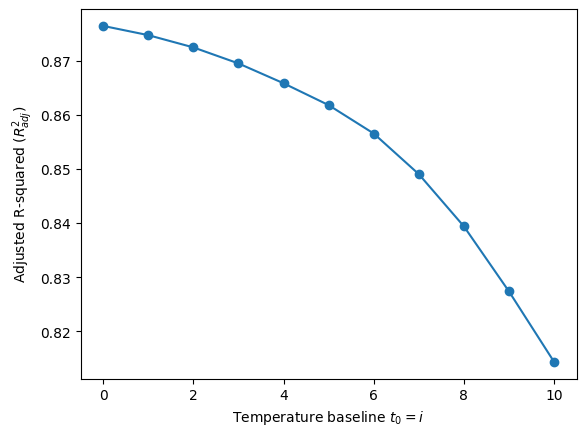

In [11]:
t0_plot['R2'] = model_t0_0.rsquared_adj, model_t0_1.rsquared_adj, model_t0_2.rsquared_adj, model_t0_3.rsquared_adj, model_t0_4.rsquared_adj, model_t0_5.rsquared_adj, model_t0_6.rsquared_adj, model_t0_7.rsquared_adj, model_t0_8.rsquared_adj, model_t0_9.rsquared_adj, model_t0_10.rsquared_adj
plt.plot(t0_plot[0], t0_plot['R2'], marker = 'o', linestyle = '-')
plt.ylabel(r'Adjusted R-squared ($R^2_{adj}$)')
plt.xlabel(r'Temperature baseline $t_0 = i$')

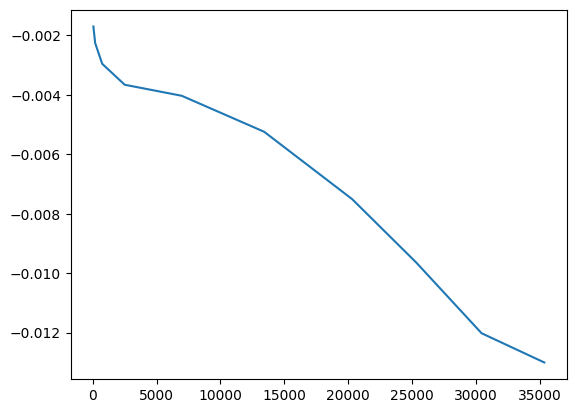

In [12]:
plt.plot(t0_plot['Daysof0'], t0_plot['R2'].diff())

Text(0.5, 0, 'Temperature baseline ($t_0 = i$)')

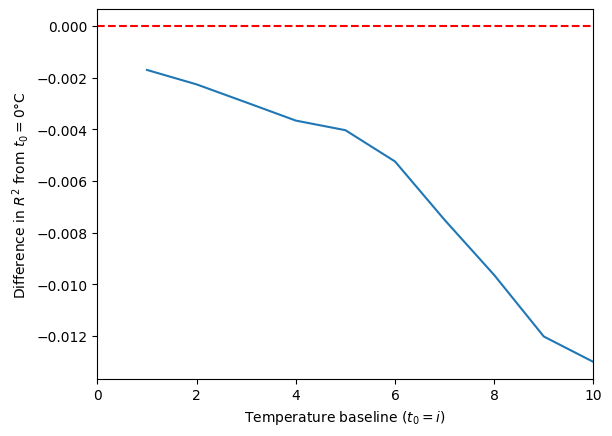

In [13]:
plt.plot(t0_plot[0], t0_plot['R2'].diff())
plt.axhline(0, c = 'r', linestyle = '--')
plt.xlim(0, 10)
plt.ylabel(r'Difference in $R^2$ from $t_0 = 0 \degree$C')
plt.xlabel(r'Temperature baseline ($t_0 = i$)')

Baseline temperature threshold for growth should be set to 0 according to AIC and R2